In [4]:
# all params...

include("MDPModelFunctions2.jl")
using PythonPlot

    CondaPkg Found dependencies: /Users/erussek/.julia/packages/PythonCall/wXfah/CondaPkg.toml
    CondaPkg Found dependencies: /Users/erussek/.julia/packages/PythonPlot/KcWMF/CondaPkg.toml
    CondaPkg Dependencies already up to date


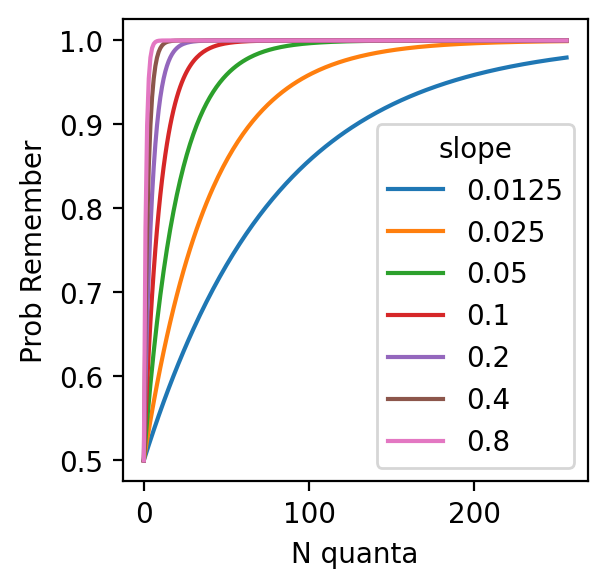

Python: Text(48.000000000000014, 0.5, 'Prob Remember')

In [150]:
#mem_slopes = round.([.01*(1.5^x) for x = 2:9], digits = 3)
mem_slopes = [.0125, .025, .05, .1, .2, .4, .8]

fig,ax = subplots(1, figsize = (3,3),dpi = 200, sharey = true)
q_vals = 0:256
[ax.plot(q_vals, prob_remember(q_vals; mem_slope = m), label = m) for m in mem_slopes]
ax.legend(title = "slope")
ax.set_xlabel("N quanta")
ax.set_ylabel("Prob Remember")

In [147]:
q_vals = ceil.(2 .^ collect(1:8))

8-element Vector{Int64}:
   2
   4
   8
  16
  32
  64
 128
 256

In [104]:
time_vals = [12, 25, 50, 100, 200, 400, 800, 1600, 3200]

9-element Vector{Int64}:
   12
   25
   50
  100
  200
  400
  800
 1600
 3200

In [143]:
eps_vals = round.(1 .- collect(.01 .* (1.5 .^ (0:2:10))), digits = 3)

6-element Vector{Float64}:
 0.99
 0.978
 0.949
 0.886
 0.744
 0.423

In [90]:
time_vals

7-element Vector{Int64}:
   50
  100
  200
  400
  800
 1600
 3200

In [125]:
40 .^ 0:7

1:7

In [50]:
length(mem_slopes)

8

In [49]:
TS_vals = collect(100:250:2200)

9-element Vector{Int64}:
  100
  350
  600
  850
 1100
 1350
 1600
 1850
 2100

In [27]:
?round

search: round rounding RoundUp RoundDown RoundToZero RoundingMode RoundNearest



```
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]])
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]]; digits=0, base=10)
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]]; sigdigits, base=10)
```

Return the nearest integral value of the same type as the complex-valued `z` to `z`, breaking ties using the specified [`RoundingMode`](@ref)s. The first [`RoundingMode`](@ref) is used for rounding the real components while the second is used for rounding the imaginary components.

`RoundingModeReal` and `RoundingModeImaginary` default to [`RoundNearest`](@ref), which rounds to the nearest integer, with ties (fractional values of 0.5) being rounded to the nearest even integer.

# Example

```jldoctest
julia> round(3.14 + 4.5im)
3.0 + 4.0im

julia> round(3.14 + 4.5im, RoundUp, RoundNearestTiesUp)
4.0 + 5.0im

julia> round(3.14159 + 4.512im; digits = 1)
3.1 + 4.5im

julia> round(3.14159 + 4.512im; sigdigits = 3)
3.14 + 4.51im
```

---

```
round([T,] x, [r::RoundingMode])
round(x, [r::RoundingMode]; digits::Integer=0, base = 10)
round(x, [r::RoundingMode]; sigdigits::Integer, base = 10)
```

Rounds the number `x`.

Without keyword arguments, `x` is rounded to an integer value, returning a value of type `T`, or of the same type of `x` if no `T` is provided. An [`InexactError`](@ref) will be thrown if the value is not representable by `T`, similar to [`convert`](@ref).

If the `digits` keyword argument is provided, it rounds to the specified number of digits after the decimal place (or before if negative), in base `base`.

If the `sigdigits` keyword argument is provided, it rounds to the specified number of significant digits, in base `base`.

The [`RoundingMode`](@ref) `r` controls the direction of the rounding; the default is [`RoundNearest`](@ref), which rounds to the nearest integer, with ties (fractional values of 0.5) being rounded to the nearest even integer. Note that `round` may give incorrect results if the global rounding mode is changed (see [`rounding`](@ref)).

# Examples

```jldoctest
julia> round(1.7)
2.0

julia> round(Int, 1.7)
2

julia> round(1.5)
2.0

julia> round(2.5)
2.0

julia> round(pi; digits=2)
3.14

julia> round(pi; digits=3, base=2)
3.125

julia> round(123.456; sigdigits=2)
120.0

julia> round(357.913; sigdigits=4, base=2)
352.0
```

!!! note
    Rounding to specified digits in bases other than 2 can be inexact when operating on binary floating point numbers. For example, the [`Float64`](@ref) value represented by `1.15` is actually *less* than 1.15, yet will be rounded to 1.2. For example:

    ```jldoctest
    julia> x = 1.15
    1.15

    julia> big(1.15)
    1.149999999999999911182158029987476766109466552734375

    julia> x < 115//100
    true

    julia> round(x, digits=1)
    1.2
    ```


# Extensions

To extend `round` to new numeric types, it is typically sufficient to define `Base.round(x::NewType, r::RoundingMode)`.

---

```
round(dt::TimeType, p::Period, [r::RoundingMode]) -> TimeType
```

Return the `Date` or `DateTime` nearest to `dt` at resolution `p`. By default (`RoundNearestTiesUp`), ties (e.g., rounding 9:30 to the nearest hour) will be rounded up.

For convenience, `p` may be a type instead of a value: `round(dt, Dates.Hour)` is a shortcut for `round(dt, Dates.Hour(1))`.

```jldoctest
julia> round(Date(1985, 8, 16), Month)
1985-08-01

julia> round(DateTime(2013, 2, 13, 0, 31, 20), Minute(15))
2013-02-13T00:30:00

julia> round(DateTime(2016, 8, 6, 12, 0, 0), Day)
2016-08-07T00:00:00
```

Valid rounding modes for `round(::TimeType, ::Period, ::RoundingMode)` are `RoundNearestTiesUp` (default), `RoundDown` (`floor`), and `RoundUp` (`ceil`).

---

```
round(x::Period, precision::T, [r::RoundingMode]) where T <: Union{TimePeriod, Week, Day} -> T
```

Round `x` to the nearest multiple of `precision`. If `x` and `precision` are different subtypes of `Period`, the return value will have the same type as `precision`. By default (`RoundNearestTiesUp`), ties (e.g., rounding 90 minutes to the nearest hour) will be rounded up.

For convenience, `precision` may be a type instead of a value: `round(x, Dates.Hour)` is a shortcut for `round(x, Dates.Hour(1))`.

```jldoctest
julia> round(Day(16), Week)
2 weeks

julia> round(Minute(44), Minute(15))
45 minutes

julia> round(Hour(36), Day)
2 days
```

Valid rounding modes for `round(::Period, ::T, ::RoundingMode)` are `RoundNearestTiesUp` (default), `RoundDown` (`floor`), and `RoundUp` (`ceil`).

Rounding to a `precision` of `Month`s or `Year`s is not supported, as these `Period`s are of inconsistent length.


In [58]:
using PythonPlot

In [54]:
function exp3a_plot_cowan_k_bars(this_cowan_k, ax; group_name = "7 year olds")

    cued_cowan_k_load_3 =  this_cowan_k[:,1]
    neutral_cowan_k_load_3 =  this_cowan_k[:,2]


    x_vals = Vector(1:3) .- .2
    y_vals = cued_cowan_k_load_3
    ax.bar(x_vals, y_vals, .4, label = "Cued")

    x_vals = Vector(1:3) .+ .2
    y_vals = neutral_cowan_k_load_3
    ax.bar(x_vals, y_vals, .4, label = "Neutral")

    ax.set_xticks(1:3)

    ax.set_xticklabels(["IM", "VSTM", "longer VSTM"], rotation = 30)

    ax.set_title(group_name)
    ax.set_ylabel("Cowan's K")
    ax.set_ylim(0,3)


    ax.legend()
end

function format_res_cowan_k(res; exp_num = 1)
    
    if exp_num == 1
    
        # row is 2 obj vs 4 obj
        # col is pre-cue, neutral, retro-cue, neutral
        
        part_pcorr = res;
        model_cowan_p_corr = [part_pcorr; part_pcorr[2,:]']'
        model_cowan_k_mtx = cowan_k(model_cowan_p_corr, 2)
        model_cowan_k_mtx[2,:] = cowan_k(model_cowan_p_corr[2,:], 4)
        
        model_cowan_k = [model_cowan_k_mtx[1,:]' model_cowan_k_mtx[2,:]']';#[model_cowan_k_mtx[1,:] model_cowan_k_mtx[2,:]]
    elseif exp_num == 2
        
        # IM cued, IM neutral, VSTM cued, VSTM neutral - need to adjust from what it was saved as
        
        (p_short_neutral, p_short_retro, p_long_neutral, p_long_retro) = res
        model_cowan_k = cowan_k([p_short_retro p_short_neutral p_long_retro p_long_neutral],4)'
        
    else
        
        (p_IM_neutral, p_IM_retro, p_VSTM_neutral, p_VSTM_retro, p_Long_VSTM_neutral, p_Long_VSTM_retro) = res

        # Load 3 cued, Load 3 Neutral, Load 6 cued, Load 6 neutral
        IM_model = [cowan_k(p_IM_retro[1],3) cowan_k(p_IM_neutral[1],3) cowan_k(p_IM_retro[2],6) cowan_k(p_IM_neutral[2], 6)]
        Short_VSTM_model = [cowan_k(p_VSTM_retro[1],3) cowan_k(p_VSTM_neutral[1],3) cowan_k(p_VSTM_retro[2],6) cowan_k(p_VSTM_neutral[2], 6)]
        Long_VSTM_model = [cowan_k(p_Long_VSTM_retro[1],3) cowan_k(p_Long_VSTM_neutral[1],3) cowan_k(p_Long_VSTM_retro[2],6) cowan_k(p_Long_VSTM_neutral[2], 6)]

        # 3 x 4
        model_cowan_k = [IM_model; Short_VSTM_model; Long_VSTM_model]  
        
    end
        
    return model_cowan_k
    
end    


format_res_cowan_k (generic function with 1 method)

mem_slope: 0.36, epsilon: 0.3, n_quanta: 3
mem_slope: 0.36, epsilon: 0.3, n_quanta: 11
mem_slope: 0.36, epsilon: 0.4, n_quanta: 3
mem_slope: 0.36, epsilon: 0.4, n_quanta: 11


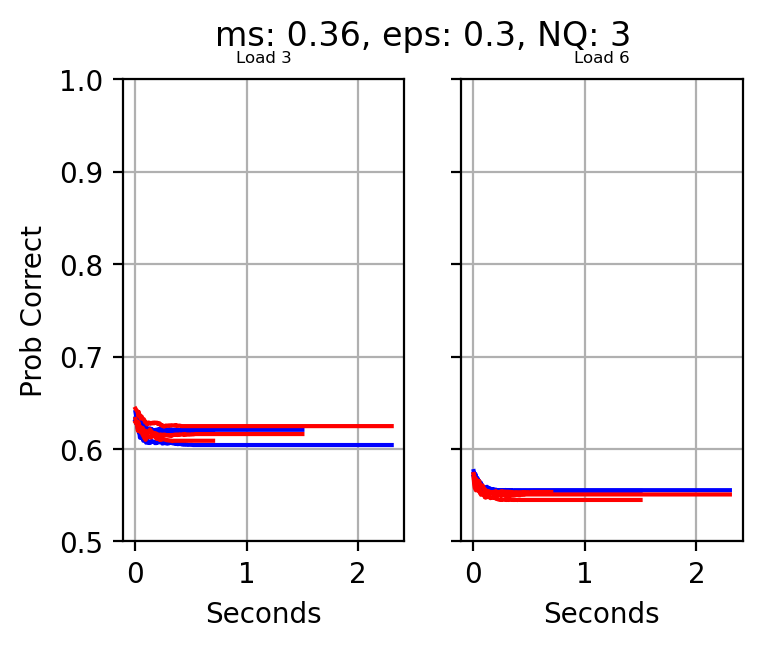

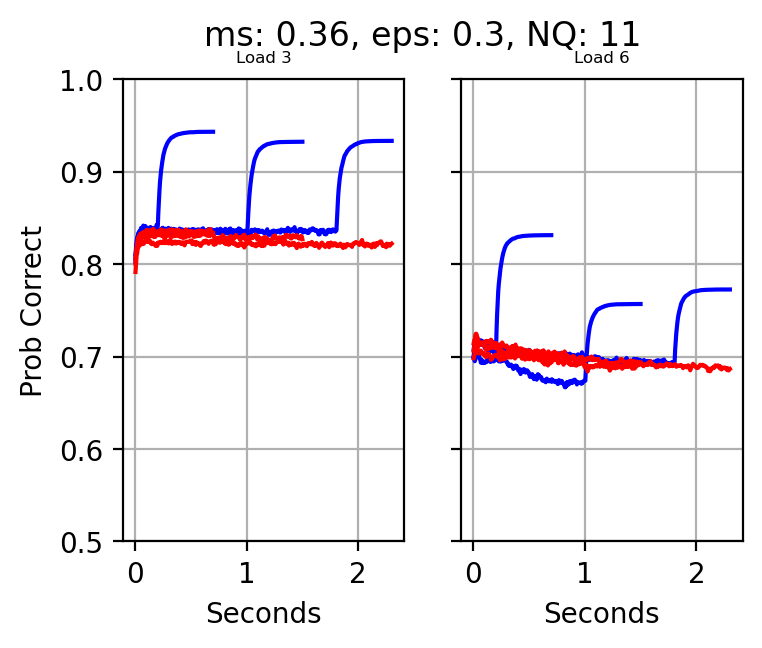

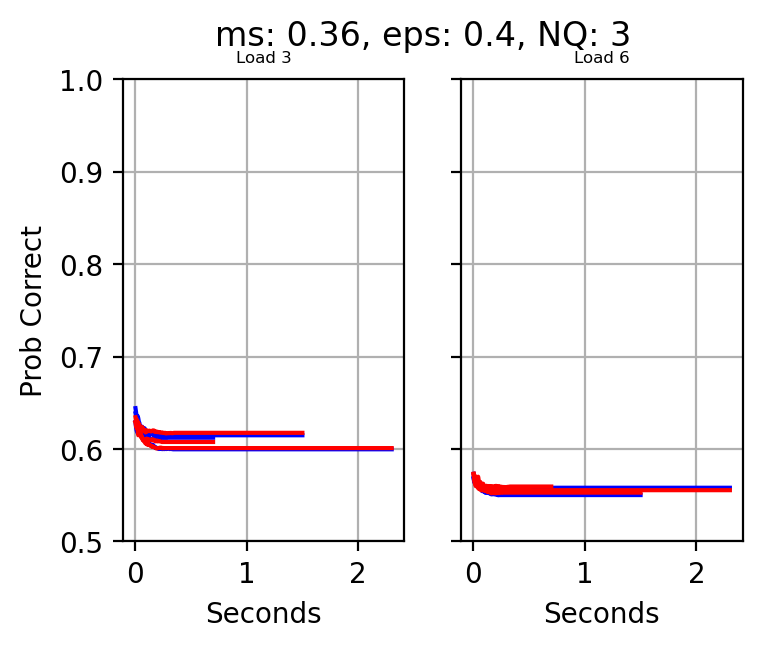

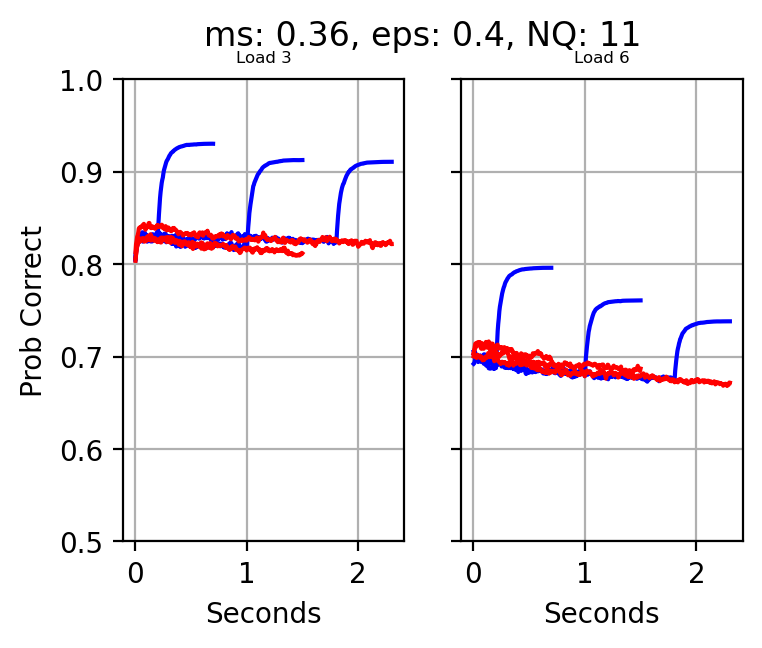

In [53]:
epsilon_vals = [.3,.4]
N_Quanta_vals = [3, 11]
NT_per_Second = 200
mem_slopes = [.36]

for mem_slope in mem_slopes
    for epsilon in epsilon_vals
        for N_Quanta in N_Quanta_vals
            
            println("mem_slope: $(mem_slope), epsilon: $(epsilon), n_quanta: $(N_Quanta)")
            
            
        
            (p_IM_neutral, p_IM_retro, p_VSTM_neutral, p_VSTM_retro, p_Long_VSTM_neutral, p_Long_VSTM_retro) = sim_exp3(epsilon, N_Quanta, NT_per_Second; mem_slope = mem_slope, N_Trials = 500, return_last_only=false)

            fig,ax = subplots(1,2, figsize = (4,3),dpi = 200, sharey = true)

            titles = ["Load 3", "Load 6"]
            for obj_idx = 1:2

                ax[obj_idx-1].plot((1:length(p_IM_retro[obj_idx,:]))./ NT_per_Second, p_IM_retro[obj_idx,:], 'b')
                ax[obj_idx-1].plot((1:length(p_VSTM_retro[obj_idx,:]))./ NT_per_Second, p_VSTM_retro[obj_idx,:], 'b')
                ax[obj_idx-1].plot((1:length(p_Long_VSTM_retro[obj_idx,:]))./ NT_per_Second, p_Long_VSTM_retro[obj_idx,:], 'b', label = "Retro")

                ax[obj_idx-1].plot((1:length(p_IM_neutral[obj_idx,:]))./ NT_per_Second, p_IM_neutral[obj_idx,:], 'r')
                ax[obj_idx-1].plot((1:length(p_VSTM_neutral[obj_idx,:]))./ NT_per_Second, p_VSTM_neutral[obj_idx,:], 'r')
                ax[obj_idx-1].plot((1:length(p_Long_VSTM_neutral[obj_idx,:]))./ NT_per_Second, p_Long_VSTM_neutral[obj_idx,:], 'r', label = "Neutral")



                ax[obj_idx-1].set_title(titles[obj_idx], fontsize = 6)
                ax[obj_idx-1].set_xlabel("Seconds")
                ax[obj_idx-1].set_ylim(.5,1)
                ax[obj_idx-1].grid()

            end

            ax[0].set_ylabel("Prob Correct")
            fig.suptitle("ms: $(mem_slope), eps: $(epsilon), NQ: $(N_Quanta)")
        
        end
    end
end

mem_slope: 0.171, epsilon: 0.8, n_quanta: 26


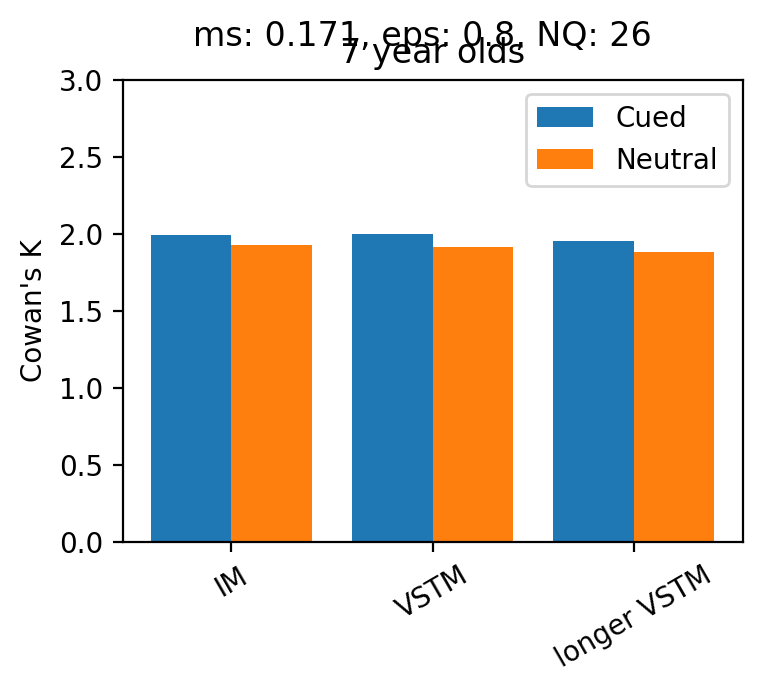

In [63]:
epsilon_vals = [.8]
N_Quanta_vals = 2 .+ 24
NT_per_Second = 350
mem_slopes = [.171]

for mem_slope in mem_slopes
    for epsilon in epsilon_vals
        for N_Quanta in N_Quanta_vals
            
            println("mem_slope: $(mem_slope), epsilon: $(epsilon), n_quanta: $(N_Quanta)")
            
            
        
            res = sim_exp3(epsilon, N_Quanta, NT_per_Second; mem_slope = mem_slope, N_Trials = 1000, return_last_only=false)
            model_cowan_k = format_res_cowan_k(res; exp_num = 3)


            fig,ax = subplots(1, figsize = (4,3),dpi = 200, sharey = true)
            
            exp3a_plot_cowan_k_bars(model_cowan_k, ax)

            fig.suptitle("ms: $(mem_slope), eps: $(epsilon), NQ: $(N_Quanta)")
        
        end
    end
end

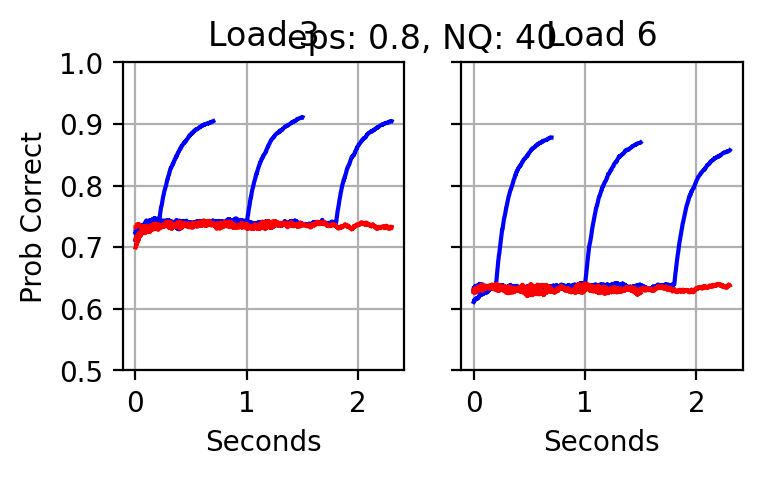

Python: Text(0.5, 0.98, 'eps: 0.8, NQ: 40')

In [70]:
fig,ax = subplots(1,2, figsize = (4,2),dpi = 200, sharey = true)

titles = ["Load 3", "Load 6"]
for obj_idx = 1:2
    
    ax[obj_idx-1].plot((1:length(p_IM_retro[obj_idx,:]))./ NT_per_Second, p_IM_retro[obj_idx,:], 'b')
    ax[obj_idx-1].plot((1:length(p_VSTM_retro[obj_idx,:]))./ NT_per_Second, p_VSTM_retro[obj_idx,:], 'b')
    ax[obj_idx-1].plot((1:length(p_Long_VSTM_retro[obj_idx,:]))./ NT_per_Second, p_Long_VSTM_retro[obj_idx,:], 'b', label = "Retro")

    ax[obj_idx-1].plot((1:length(p_IM_neutral[obj_idx,:]))./ NT_per_Second, p_IM_neutral[obj_idx,:], 'r')
    ax[obj_idx-1].plot((1:length(p_VSTM_neutral[obj_idx,:]))./ NT_per_Second, p_VSTM_neutral[obj_idx,:], 'r')
    ax[obj_idx-1].plot((1:length(p_Long_VSTM_neutral[obj_idx,:]))./ NT_per_Second, p_Long_VSTM_neutral[obj_idx,:], 'r', label = "Neutral")


    
    ax[obj_idx-1].set_title(titles[obj_idx])
    ax[obj_idx-1].set_xlabel("Seconds")
    ax[obj_idx-1].set_ylim(.5,1)
    ax[obj_idx-1].grid()
    
end

ax[0].set_ylabel("Prob Correct")
fig.suptitle("eps: $(epsilon), NQ: $(N_Quanta)")

In [12]:
size(p_IM_Neutral)

LoadError: UndefVarError: `p_IM_Neutral` not defined